##### Imports 

In [1]:
import pandas as pd
import csv
import logging
from functions_py.mephys_funcs import read_file, merge_dataframes, filter_date, drop_cols, drop_nans, \
create_cond_df, create_container_df

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context = "notebook", style = "ticks", font="verdana") # font_scale = 1.35)

##### Pandas Display Settings

In [2]:
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

##### Lists/Paths

In [3]:
fields_jem = ["date", "organism_name", "name", "container", "rigOperator",
              "status", "roi_major", "roi_minor",
              "extraction.postPatch", "extraction.endPipetteR"]
fields_ephys = ["b'name'", "b'patched_cell_container'", "b'vrest'", "b'ri'", "b'sag'", 
                "b'tau'", "b'upstroke_downstroke_ratio_long_square'", 
                "b'latency'", "b'f_i_curve_slope'"]
fields_shiny = ["cell_name_label", "sample_id",
                "subclass_label", "topLeaf_label", "broad_class_label",
                "Tree_call_label", "cell_specimen_project_label", 
                "marker_sum_norm_label", "Norm_Marker_Sum.0.4_label", "Tree_call_label"]


path_jem = "Z:/Patch-Seq/compiled-jem-data/jem_metadata.csv"
#path_jem = "C:/Users/ramr/Documents/Github/analysis_projects/csv/jem_metadata.csv"
path_ephys = "C:/Users/ramr/Documents/Github/analysis_projects/csv/mephys_features.csv"
#path_shiny = "//allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/patch_seq/star/mouse_patchseq_VISp_current/mapping.df.with.bp.40.lastmap.csv"
path_shiny = "C:/Users/ramr/Documents/Github/analysis_projects/csv/shiny.csv"

drop_cols_list = ["b'name'", "b'patched_cell_container'", "cell_name_label", "sample_id"]
drop_nans_list = ["date", "name", "rigOperator"]

r_users = ["kristenh", "lindsayn", "ramr", "katherineb", "jessicat"]

In [4]:
shiny = shiny = read_file(path_shiny, fields_shiny)

INFO:functions_py.mephys_funcs:Read file in as a pandas dataframe


In [5]:
shiny

cell_name_label  \
0     Oxtr-T2A-Cre;Pvalb-T2A-FlpO;Ai65-360187.04.02.01   
1                    Oxtr-T2A-Cre;Ai14-359344.04.01.01   
2                    Vip-IRES-Cre;Ai14-359509.04.02.02   
3                Ndnf-IRES2-dgCre;Ai14-361703.04.01.02   
4                  Rbp4-Cre_KL100;Ai14-362155.05.01.01   
...                                                ...   
4264                                        ZZ_Missing   
4265                                        ZZ_Missing   
4266                                        ZZ_Missing   
4267                                        ZZ_Missing   
4268                                        ZZ_Missing   

     cell_specimen_project_label                           sample_id  \
0                     mIVSCC-MET                 P8S4_171122_353_A01   
1                     mIVSCC-MET                 P2S4_171121_051_A01   
2                     mIVSCC-MET                 P8S4_171122_352_A01   
3                     mIVSCC-MET                 P9S4_171201_407_A01   
4                     mIVSCC-MET                 P9S4_171201_403_A01   
...                          ...                                 ...   
4264                  ZZ_Missing  Smartseq_cells.SM-GE91G_S023_E1-50   
4265                  ZZ_Missing  Smartseq_cells.SM-GE91L_S349_E1-50   
4266                  ZZ_Missing  Smartseq_cells.SM-GE91P_S165_E1-50   
4267                  ZZ_Missing  Smartseq_cells.SM-GE93E_S231_E1-50   
4268                  ZZ_Missing  Smartseq_cells.SM-GE93Z_S211_E1-50   

          topLeaf_label subclass_label broad_class_label Tree_call_label  \
0                122_DG             DG     Glutamatergic            Core   
1                124_DG             DG     Glutamatergic            Core   
2                125_DG             DG     Glutamatergic            Core   
3                125_DG             DG     Glutamatergic            Core   
4                125_DG             DG     Glutamatergic              I1   
...                 ...            ...               ...             ...   
4264      228_L6 IT CTX      L6 IT CTX     Glutamatergic      ZZ_Missing   
4265  209_L5 IT TPE-ENT  L5 IT TPE-ENT     Glutamatergic      ZZ_Missing   
4266  212_L5 IT TPE-ENT  L5 IT TPE-ENT     Glutamatergic      ZZ_Missing   
4267            264_SUB            SUB     Glutamatergic      ZZ_Missing   
4268      228_L6 IT CTX      L6 IT CTX     Glutamatergic      ZZ_Missing   

      marker_sum_norm_label  Norm_Marker_Sum.0.4_label  
0                  0.387929                      False  
1                  0.481428                       True  
2                  0.566167                       True  
3                  0.589214                       True  
4                  0.762639                       True  
...                     ...                        ...  
4264               1.197775                       True  
4265               1.267046                       True  
4266               1.206065                       True  
4267               0.883404                       True  
4268               1.001193                       True  

[4269 rows x 9 columns]

##### Main

In [6]:
def main():
    global merge_all, merge_all_glu, merge_all_gab, jem, shiny
    jem = read_file(path_jem, fields_jem)
    ephys = read_file(path_ephys, fields_ephys)
    shiny = read_file(path_shiny, fields_shiny)
    merge_je = merge_dataframes(jem, ephys, "name", "b'name'")
    merge_all = merge_dataframes(merge_je, shiny, "name", "cell_name_label")
    merge_all = filter_date(merge_all, "date")
    merge_all = drop_cols(merge_all, drop_cols_list)
    merge_all = drop_nans(merge_all, drop_nans_list)
    merge_all = create_container_df(merge_all, "container")
    merge_all = create_cond_df(merge_all, "rigOperator", r_users)
    merge_all_glu = create_cond_df(merge_all, "broad_class_label", ["Glutamatergic"])
    merge_all_gab = create_cond_df(merge_all, "broad_class_label", ["GABAergic"])

In [7]:
if __name__ == "__main__":
    main()

INFO:functions_py.mephys_funcs:Read file in as a pandas dataframe
INFO:functions_py.mephys_funcs:Read file in as a pandas dataframe
INFO:functions_py.mephys_funcs:Read file in as a pandas dataframe
INFO:functions_py.mephys_funcs:Merged two pandas dataframe into one dataframe
INFO:functions_py.mephys_funcs:Merged two pandas dataframe into one dataframe
INFO:functions_py.mephys_funcs:Sorted date to only display 2020 data
INFO:functions_py.mephys_funcs:Dropped columns: ["b'name'", "b'patched_cell_container'", 'cell_name_label', 'sample_id']
INFO:functions_py.mephys_funcs:Dropped NaNs from these columns: ['date', 'name', 'rigOperator']
INFO:functions_py.mephys_funcs:Created a container_label column to show(ex.'PA')
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values


In [8]:
merge_all

date organism_name  \
1     2019-01-07 13:38:33 -0800         Mouse   
2     2019-01-07 13:38:33 -0800         Mouse   
3     2019-01-10 13:43:43 -0800         Mouse   
4     2019-01-21 13:48:44 -0800         Mouse   
5     2019-01-21 13:48:44 -0800         Mouse   
...                         ...           ...   
1688  2020-01-27 13:59:45 -0800         Mouse   
1689  2020-01-27 13:59:45 -0800         Mouse   
1690  2020-01-27 13:59:45 -0800         Mouse   
1691  2020-01-27 14:03:14 -0800         Mouse   
1692  2020-01-27 15:00:02 -0800         Mouse   

                                                         name  \
1                                     C57BL6J-436184.05.03.01   
2                                     C57BL6J-436184.05.03.02   
3                                     C57BL6J-436185.04.03.03   
4                        Ntsr1-Cre_GN220;Ai14-437770.03.02.01   
5                        Ntsr1-Cre_GN220;Ai14-437770.03.02.02   
...                                                       ...   
1688  Vipr2-IRES2-Cre;Slc32a1-IRES2-FlpO;Ai65-508158.02.02.03   
1689  Vipr2-IRES2-Cre;Slc32a1-IRES2-FlpO;Ai65-508158.02.02.02   
1690  Vipr2-IRES2-Cre;Slc32a1-IRES2-FlpO;Ai65-508158.02.02.01   
1691                              Th-P2A-FlpO-507995.11.01.01   
1692                              Th-P2A-FlpO-507995.12.02.01   

      extraction.endPipetteR extraction.postPatch rigOperator   status  \
1                     1500.0      nucleus_present    lindsayn  SUCCESS   
2                       10.0      nucleus_present    lindsayn  SUCCESS   
3                      500.0      nucleus_present    kristenh  SUCCESS   
4                     1000.0      nucleus_present    jessicat  SUCCESS   
5                     1000.0      nucleus_present    jessicat  SUCCESS   
...                      ...                  ...         ...      ...   
1688                  2000.0      nucleus_present    lindsayn  SUCCESS   
1689                   600.0      nucleus_present    lindsayn  SUCCESS   
1690                  1500.0      nucleus_present    lindsayn  SUCCESS   
1691                   300.0      nucleus_present    kristenh  SUCCESS   
1692                  5000.0      nucleus_present  katherineb  SUCCESS   

     roi_major  roi_minor            container   b'vrest'       b'ri'  \
1          MOp  layer 2/3  PXS4_190107_354_A01        NaN         NaN   
2          MOp  layer 2/3  PXS4_190107_355_A01        NaN         NaN   
3          MOp  layer 2/3  PXS4_190110_002_A01        NaN         NaN   
4         VISp   layer 6a  PFS4_190121_701_A01 -70.266129  144.187510   
5         VISp   layer 6b  PFS4_190121_702_A01 -58.586740  293.401420   
...        ...        ...                  ...        ...         ...   
1688      RSPv  layer 2/3  P8S4_200127_358_A01 -65.251154  127.218783   
1689      RSPd    layer 5  P8S4_200127_357_A01 -68.080424  125.937507   
1690      RSPd    layer 5  P8S4_200127_356_A01 -60.492583  265.906245   
1691      RSPd    layer 5  P1S4_200127_002_A01 -76.165486  238.257259   
1692       MOs  layer 2/3  PES4_200127_656_A01 -71.427484   77.765614   

        b'sag'     b'tau'  b'upstroke_downstroke_ratio_long_square'  \
1          NaN        NaN                                       NaN   
2          NaN        NaN                                       NaN   
3          NaN        NaN                                       NaN   
4     0.126209  12.255976                                  2.688475   
5     0.162729  28.654920                                  3.857525   
...        ...        ...                                       ...   
1688  0.289014  14.091485                                  3.830985   
1689  0.169674  12.140845                                  3.038807   
1690  0.172725  23.230423                                  2.795705   
1691  0.000629  27.852123                                  3.459082   
1692  0.199825  13.938614                                  2.667668   

      b'latency'  b'f_i_curve_slope' c

##### Mouse Region Dataframes

In [9]:
rsp = create_cond_df(merge_all, "roi_major", ["RSPd", "RSPv"])
ssp = create_cond_df(merge_all, "roi_major", ["SSp"])
orb = create_cond_df(merge_all, "roi_major", ["ORB"])
ctxsp = create_cond_df(merge_all, "roi_major", ["CTXsp"])
mo = create_cond_df(merge_all, "roi_major", ["MOp", "MOs"])
visp = create_cond_df(merge_all, "roi_major", ["VISp"])

INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values


##### Gluatamatergic Mouse Region Dataframes

In [10]:
rsp_glu = create_cond_df(merge_all_glu, "roi_major", ["RSPd", "RSPv"])
ssp_glu = create_cond_df(merge_all_glu, "roi_major", ["SSp"])
orb_glu = create_cond_df(merge_all_glu, "roi_major", ["ORB"])
ctxsp_glu = create_cond_df(merge_all_glu, "roi_major", ["CTXsp"])
mo_glu = create_cond_df(merge_all_glu, "roi_major", ["MOp", "MOs"])
visp_glu = create_cond_df(merge_all_glu, "roi_major", ["VISp"])

rsp_glu.replace({"roi_major": {"RSPd": "RSP", "RSPv": "RSP"}}, inplace=True)
mo_glu.replace({"roi_major": {"MOp": "MO", "MOs": "MO"}}, inplace=True)

INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


##### GABAergic Mouse Region Dataframes

In [11]:
rsp_gab = create_cond_df(merge_all_gab, "roi_major", ["RSPd", "RSPv"])
ssp_gab = create_cond_df(merge_all_gab, "roi_major", ["SSp"])
orb_gab = create_cond_df(merge_all_gab, "roi_major", ["ORB"])
ctxsp_gab = create_cond_df(merge_all_gab, "roi_major", ["CTXsp"])
mo_gab = create_cond_df(merge_all_gab, "roi_major", ["MOp", "MOs"])
visp_gab = create_cond_df(merge_all_gab, "roi_major", ["VISp"])

rsp_gab.replace({"roi_major": {"RSPd": "RSP", "RSPv": "RSP"}}, inplace=True)
mo_gab.replace({"roi_major": {"MOp": "MO", "MOs": "MO"}}, inplace=True)

INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values


Empty DataFrame
Columns: [date, organism_name, name, extraction.endPipetteR, extraction.postPatch, rigOperator, status, roi_major, roi_minor, container, b'vrest', b'ri', b'sag', b'tau', b'upstroke_downstroke_ratio_long_square', b'latency', b'f_i_curve_slope', cell_specimen_project_label, topLeaf_label, subclass_label, broad_class_label, Tree_call_label, marker_sum_norm_label, Norm_Marker_Sum.0.4_label, container_label]
Index: []

##### Count Dictionary

In [12]:
region_dict = {"Overall Mouse Total count": merge_all.name.count(),
               "RSP Total": rsp.name.count(),
               "SSp Total": ssp.name.count(),
               "ORB Total": orb.name.count(),
               "CTXsp Total": ctxsp.name.count(),
               "MO Total": mo.name.count(),
               "VISp Total": visp.name.count()}

glu_dict = {"Glutamatergic Mouse Total count": merge_all_glu.name.count(),
            "RSP": rsp_glu.name.count(),
            "SSp": ssp_glu.name.count(),
            "ORB": orb_glu.name.count(),
            "CTXsp": ctxsp_glu.name.count(),
            "MO": mo_glu.name.count(),
            "VISp": visp_glu.name.count()}

gab_dict = {"GABAergic Mouse Total count": merge_all_gab.name.count(),
            "RSP": rsp_gab.name.count(),
            "SSp": ssp_gab.name.count(),
            "ORB": orb_gab.name.count(),
            "CTXsp": ctxsp_gab.name.count(),
            "MO": mo_gab.name.count(),
            "VISp": visp_gab.name.count()}

In [13]:
region_dict
for k,v in region_dict.items():
    print(f"{k} : {v}")

Overall Mouse Total count : 1682
RSP Total : 62
SSp Total : 20
ORB Total : 19
CTXsp Total : 9
MO Total : 35
VISp Total : 1449


In [14]:
glu_dict
for k,v in glu_dict.items():
    print(f"{k} : {v}")

Glutamatergic Mouse Total count : 1682
RSP : 62
SSp : 20
ORB : 19
CTXsp : 9
MO : 35
VISp : 1449


In [15]:
gab_dict
for k,v in gab_dict.items():
    print(f"{k} : {v}")

GABAergic Mouse Total count : 0
RSP : 0
SSp : 0
ORB : 0
CTXsp : 0
MO : 0
VISp : 0


##### Paths

In [16]:
csv_path = "C:/Users/ramr/Documents/Github/analysis_projects/csv/"
excel_path = "C:/Users/ramr/Documents/Github/analysis_projects/excel/"
plot_path = "C:/Users/ramr/Documents/Github/analysis_projects/plot/"

##### Writing to csv_file

In [17]:
#jem.to_csv(csv_path + "jem.csv")
#jem_2020.to_csv(csv_path + "jem_2020.csv")

##### Writing to excel_file

In [18]:
writer = pd.ExcelWriter(excel_path + "new_region.xlsx")
merge_all.to_excel(writer, "All", freeze_panes=(1,0))
rsp.to_excel(writer, "RSP", freeze_panes=(1,0))
ssp.to_excel(writer, "SSP", freeze_panes=(1,0))
orb.to_excel(writer, "ORB", freeze_panes=(1,0))
ctxsp.to_excel(writer, "CTXsp", freeze_panes=(1,0))
mo.to_excel(writer, "MO", freeze_panes=(1,0))
visp.to_excel(writer, "VISp", freeze_panes=(1,0))
writer.save()

##### RSP Plots

In [19]:
rsp_visp_glu = pd.concat([rsp_glu, visp_glu])

In [20]:
ssp_glu.min()

date                                                                 2019-12-23 10:22:22 -0800
organism_name                                                                            Mouse
name                                        Chrna2-Cre_OE25;Sst-IRES-FlpO;Ai65-502985.11.02.01
extraction.endPipetteR                                                                      20
extraction.postPatch                                                           nucleus_present
rigOperator                                                                           jessicat
status                                                                                 SUCCESS
roi_major                                                                                  SSp
roi_minor                                                                            layer 2/3
container                                                                  P8S4_191223_351_A01
b'vrest'                                          

In [21]:
def box_plt(col_y, jpg_title, plt_title, ylim_min, ylim_max, df):
    """Creates a box plot using seaborn and compares the ephys features between
    two mouse regions while displaying the t-types.
    Args:
        col_y(string): y-axis column
        jpg_title(string): title of the jpeg file
        plt_tile(string): title of the plot
        df: a pandas dataframe
    Returns: None
    """
    b_colors={"RSP": "#a1d99b", "VISp": "#9ecae1"}
    s_colors={"RSP": "#41ab5d", "VISp": "#4292c6"}

    fig_dims = (12, 8)
    f, axes = plt.subplots(figsize=fig_dims)

    ax = sns.boxplot(x="subclass_label",
                     y=col_y,
                     hue="roi_major",
                     data=df,
                     #order = ["L2/3 IT", "L4", "L5 IT", "L5 PT", "L6 IT", "L6b", "NP"],
                     #hue_order = ["RSP", "VISp"],
                     #palette=b_colors,
                     saturation=1,
                     width=0.8,
                     linewidth=1.3,
                     showfliers=False)

    ax = sns.stripplot(x="subclass_label",
                       y=col_y,
                       hue="roi_major",
                       data=df,
                       #order = ["L2/3 IT", "L4", "L5 IT", "L5 PT", "L6 IT", "L6b", "NP"],
                       #hue_order = ["RSP", "VISp"],
                       jitter=False,
                       size=4.5,
                       #palette=s_colors, #color="0.2",
                       split=True,
                       linewidth=0.5)
    
    #sns.despine(trim=True)
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:2], labels[0:2], title="Region")
    
    plt.xticks(rotation=90)
    
    #ax.legend_.remove()
    ax.set(xlabel="Subclass", ylabel=plt_title)
    ax.set(ylim=(ylim_min, ylim_max))
    plt.savefig(plot_path + "box_plt_" + jpg_title + ".jpeg", bbox_inches="tight")

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


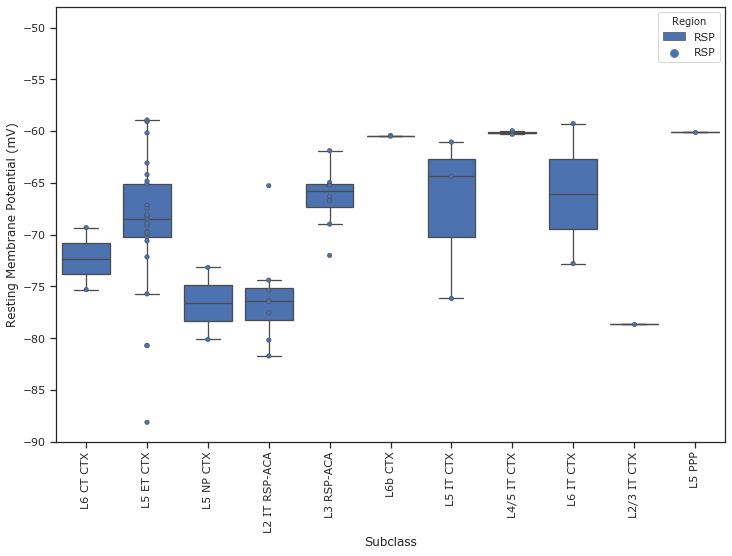

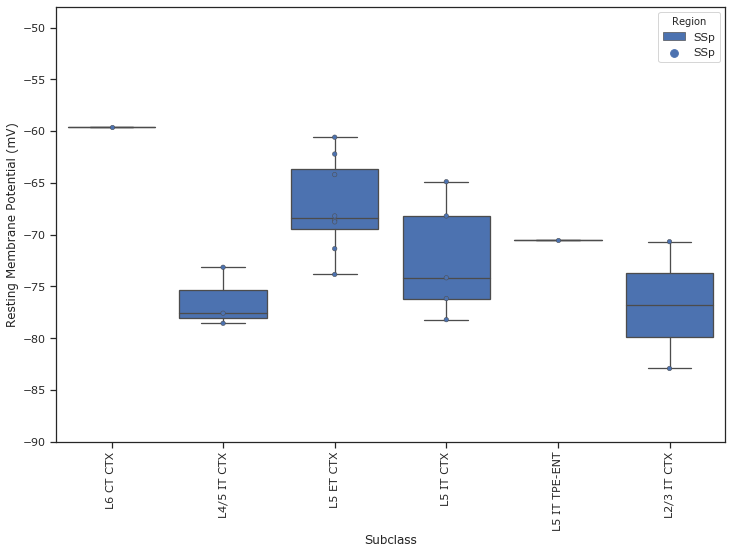

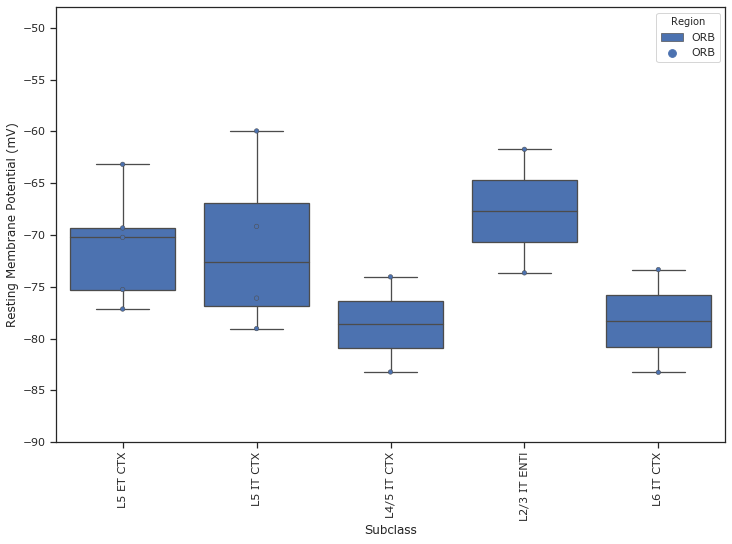

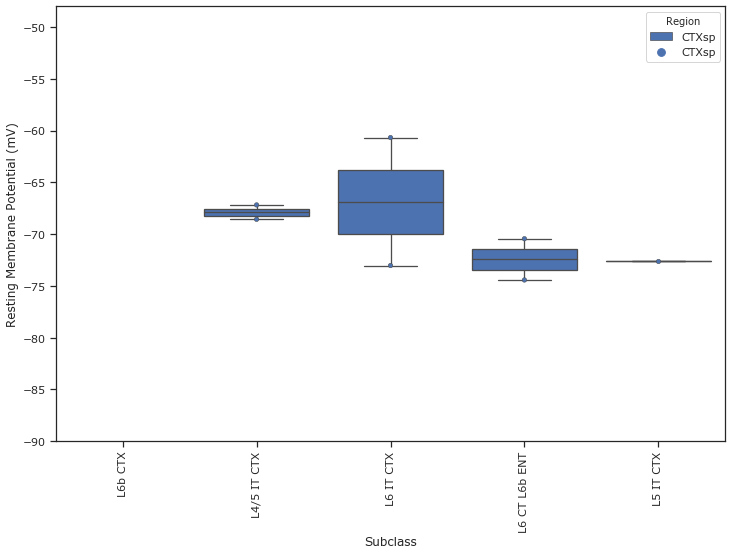

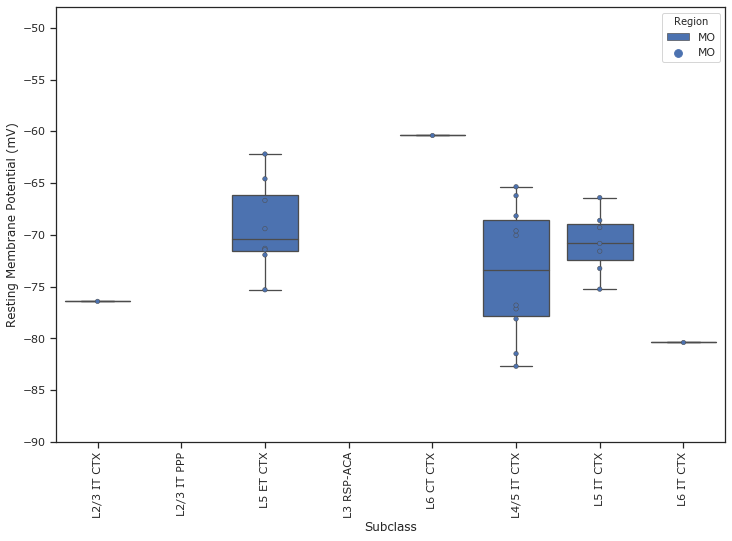

In [22]:
box_plt("b'vrest'", "rmp", "Resting Membrane Potential (mV)", -90, -48, rsp_glu)
box_plt("b'vrest'", "rmp", "Resting Membrane Potential (mV)", -90, -48, ssp_glu)
box_plt("b'vrest'", "rmp", "Resting Membrane Potential (mV)", -90, -48, orb_glu)
box_plt("b'vrest'", "rmp", "Resting Membrane Potential (mV)", -90, -48, ctxsp_glu)
box_plt("b'vrest'", "rmp", "Resting Membrane Potential (mV)", -90, -48, mo_glu)

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ramr\AppData\Local\Continu

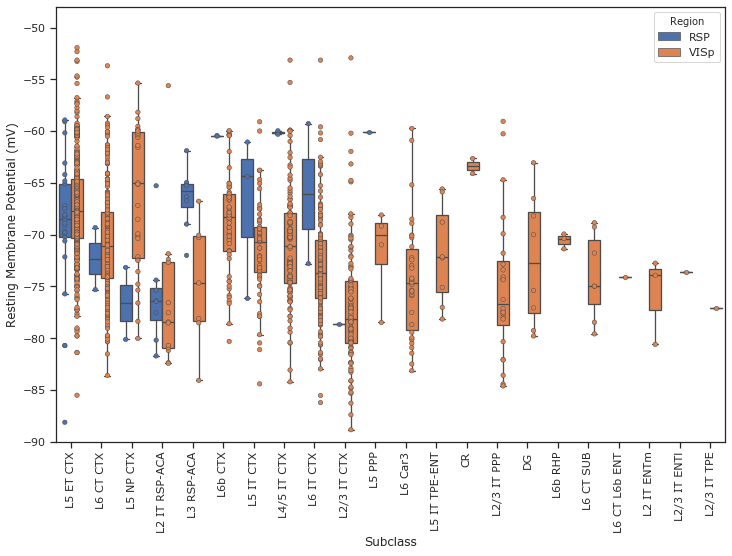

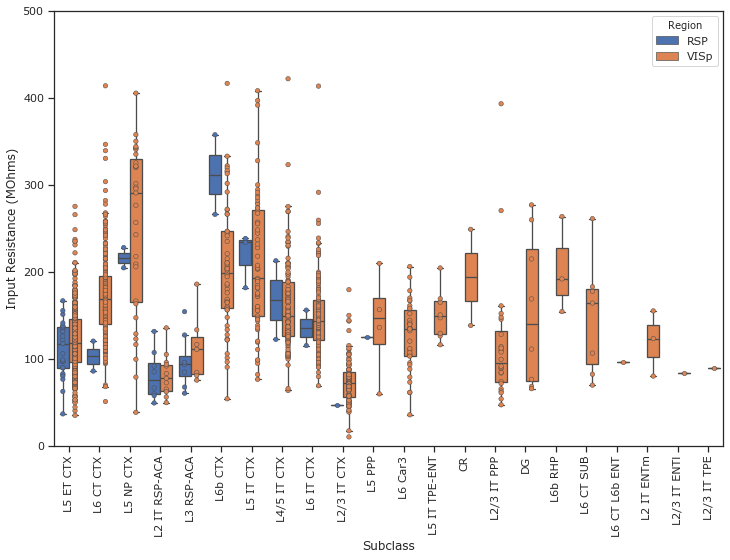

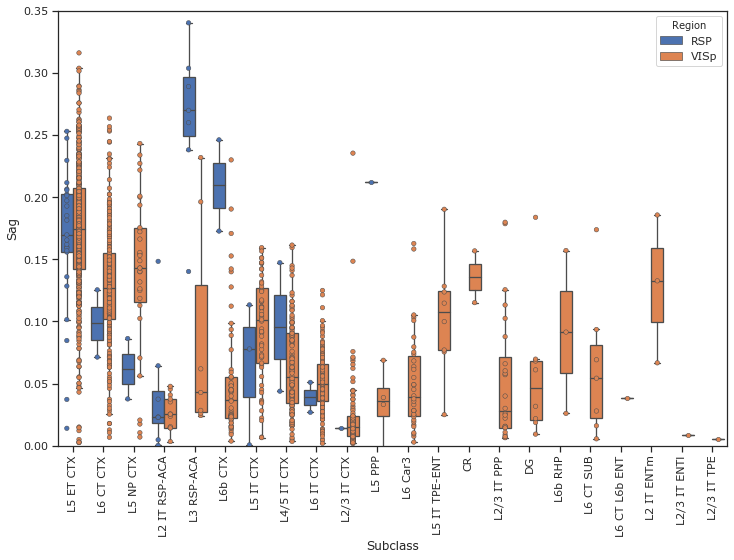

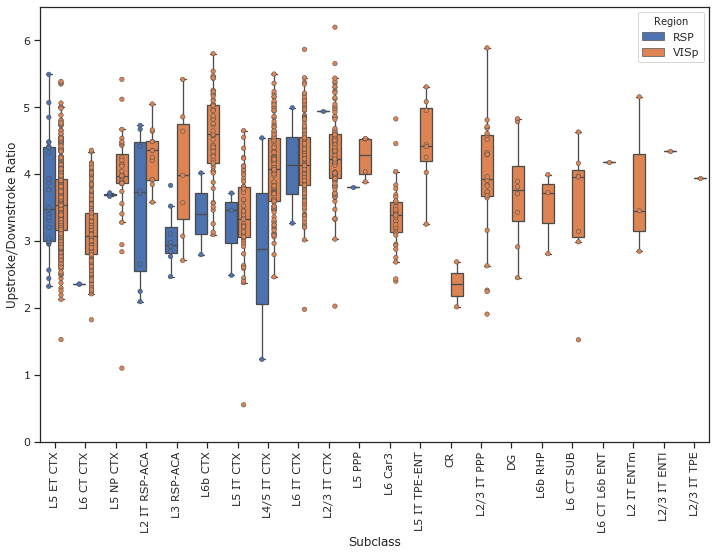

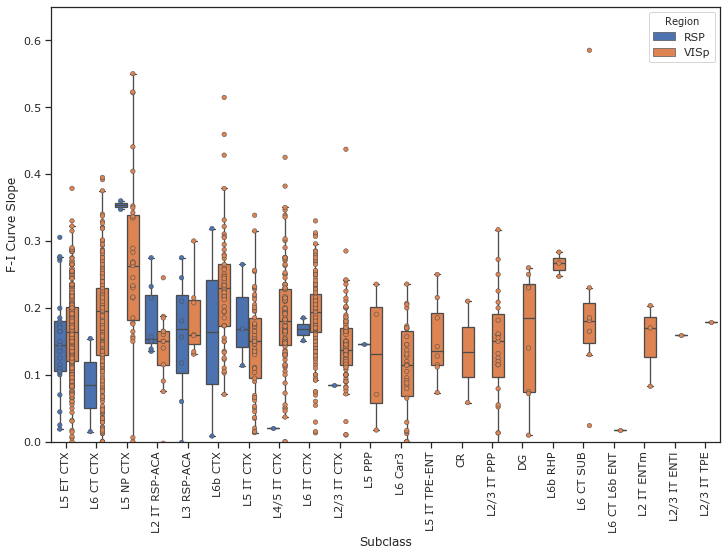

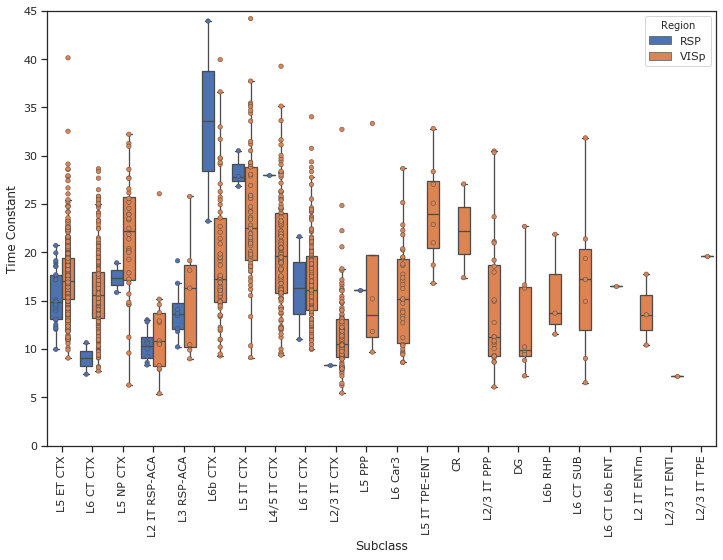

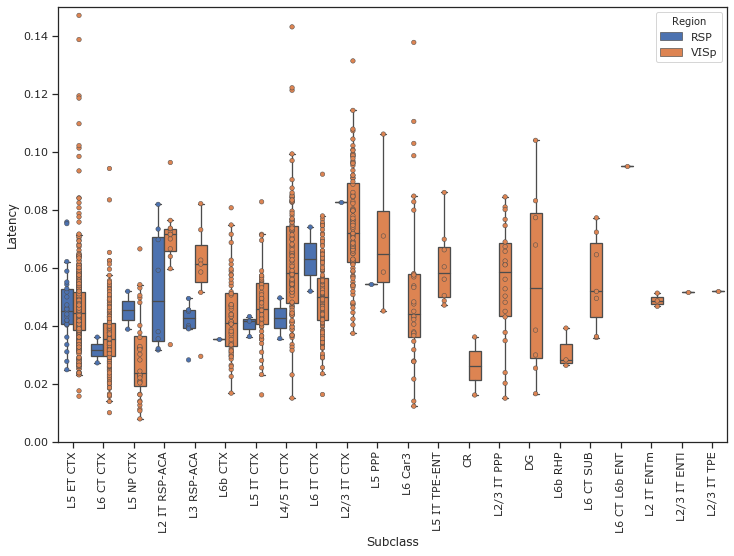

In [23]:
box_plt("b'vrest'", "rmp", "Resting Membrane Potential (mV)", -90, -48,
       rsp_visp_glu[rsp_visp_glu["b'vrest'"] < -50])
box_plt("b'ri'", "ri", "Input Resistance (MOhms)", 0, 500,
        rsp_visp_glu[rsp_visp_glu["b'ri'"] < 450])
box_plt("b'sag'", "sag", "Sag", 0, 0.35,
        rsp_visp_glu[rsp_visp_glu["b'sag'"] < 0.35])
box_plt("b'upstroke_downstroke_ratio_long_square'", "upd", "Upstroke/Downstroke Ratio", 0, 6.5,
        rsp_visp_glu[rsp_visp_glu["b'upstroke_downstroke_ratio_long_square'"] < 7])
box_plt("b'f_i_curve_slope'", "fi", "F-I Curve Slope", 0, 0.65,
       rsp_visp_glu[rsp_visp_glu["b'f_i_curve_slope'"] < 0.6])
box_plt("b'tau'", "tau", "Time Constant", 0, 45,
        rsp_visp_glu[rsp_visp_glu["b'tau'"] < 45]) 
box_plt("b'latency'", "lat", "Latency", 0, 0.15,
        rsp_visp_glu[rsp_visp_glu["b'latency'"] < 0.15]) 

##### All Plots

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWar

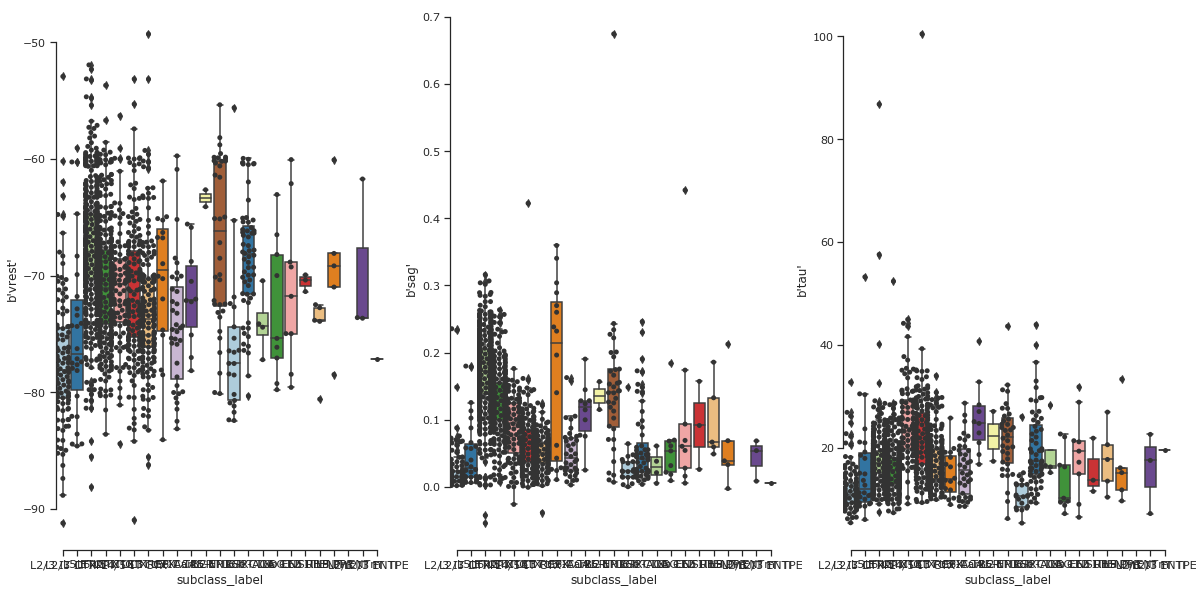

In [24]:
fig_dims = (20, 10)
f, axes = plt.subplots(1, 3, figsize=fig_dims)

sns.boxplot(x="subclass_label",
              y="b'vrest'",
              data=merge_all_glu, palette="Paired", ax=axes[0])
sns.swarmplot(x="subclass_label",
              y="b'vrest'",
              data=merge_all_glu, color="0.2", ax=axes[0])

sns.boxplot(x="subclass_label",
              y="b'sag'",
              data=merge_all_glu, palette="Paired", ax=axes[1])
sns.swarmplot(x="subclass_label",
              y="b'sag'",
              data=merge_all_glu, color="0.2", ax=axes[1])

sns.boxplot(x="subclass_label",
              y="b'tau'",
              data=merge_all_glu, palette="Paired", ax=axes[2])
sns.swarmplot(x="subclass_label",
              y="b'tau'",
              data=merge_all_glu, color="0.2", ax=axes[2])
sns.despine(trim=True, left=False)

###### Misc


def date_return(df):
    df = df.reset_index()
    start_date = df["date"].iloc[0][0:10]
    end_date = df["date"].iloc[-1][0:10]
    df = df.set_index(["date"])
    logger.info("Created date")
    return df, start_date, end_date



def print_counts():
    """Prints counts of dataframes"""
    #print(f"Date Range: {start_date} to {end_date}")
    print(f"Overall Total count: {jem_2020.container.count()}")
    print()
    print(f"Mouse Total count: {mjem_2020.organism_name.count()}")
    print(f"-RSPd count: {rspd.organism_name.count()}")
    print(f"-RSPv count: {rspv.organism_name.count()}")
    print(f"-SSp count: {ssp.organism_name.count()}")
    print(f"-ORB count: {orb.organism_name.count()}")
    print(f"-CTXsp count: {ctxsp.organism_name.count()}")
    print(f"-MOp count: {mop.organism_name.count()}")
    print(f"-MOs count: {mos.organism_name.count()}")
    print(f"-HY count: {hy.organism_name.count()}")
    print(f"-HIP count: {hip.organism_name.count()}")
    print(f"-VISP count: {visp.organism_name.count()}")
    print()
    print(f"Human Total count: {hjem_2020.organism_name.count()}")
    print(f"-Human Acute count: {hajem_2020.organism_name.count()}")
    print(f"-Human Culture count: {hcjem_2020.organism_name.count()}")

def main():
    jem_2020 = read_jem()
    logger.info("Imported jem_metadata.csv as a dataframe")
    jem_2020 = choice()
    
    jem_2020["p_container"] = jem_2020.container.str[0:4]
    logger.info("Creating column to check p_container")
    jem_2020.p_container.unique()
    
    #jem_2020 = date_return(jem_2020)
    #print(start_date)

    mjem_2020 = create_cond_df(jem_2020, "organism_name", "Mouse")
    hjem_2020 = create_cond_df(jem_2020, "organism_name", "Human")
    hajem_2020 = hjem_2020[hjem_2020["p_container"] != "PCS4"]
    hcjem_2020 = create_cond_df(hjem_2020, "p_container", "PCS4")

    mjem_2020 = create_region_col(mjem_2020)
    rspd = create_cond_df(mjem_2020, "roi_major", "RSPd")
    rspv = create_cond_df(mjem_2020, "roi_major", "RSPv")
    ssp = create_cond_df(mjem_2020, "roi_major", "SSp")
    orb = create_cond_df(mjem_2020, "roi_major", "ORB")
    ctxsp = create_cond_df(mjem_2020, "roi_major", "CTXsp")
    mop = create_cond_df(mjem_2020, "roi_major", "MOp")
    mos = create_cond_df(mjem_2020, "roi_major", "MOs")
    hy = create_cond_df(mjem_2020, "roi_major", "HY")
    hip = create_cond_df(mjem_2020, "roi_major", "HIP")
    visp = create_cond_df(mjem_2020, "roi_major", "VISP")
    logger.info("Created region pandas dataframes")
    print_counts()



def create_region_col(df):
    """"""
    df["new_region"] = "default_value"
    LOGGER.info("Created a new column(new_region) with default_value")
    
    c_region = ["RSPd", "RSPv", "SSp"] 
    s_region = ["MOs", "MOp", "ORB", "CTXsp"]
    o_region = ["HY", "HIP"]
    v_region = ["VISp"]
    
    df["new_region"][df.roi_major.str.contains("|".join(c_region))] = "coronal_region"
    df["new_region"][df.roi_major.str.contains("|".join(s_region))] = "sagittal_region"
    df["new_region"][df.roi_major.str.contains("|".join(o_region))] = "other_region"
    df["new_region"][df.roi_major.str.contains("|".join(v_region))] = "v1_region"
    LOGGER.info("Filled in new_region column with region labels")
    return df


def choice():
    """"""
    r_users = ["kristenh", "lindsayn", "ramr", "katherineb", "jessicat"]
    r_user = ["ramr"]
    
    global entry

    print("These are all user options: kristenh, lindsayn, ramr, katherineb, jessicat")
    entry = input("Enter single user name or all users (a):")
    if entry == "a":
        jem_2020 = sort_df(jem, r_users)
    elif entry == "kristenh":
        jem_2020 = sort_df(jem, r_users[0])
    elif entry == "lindsayn":
        jem_2020 = sort_df(jem, r_users[1])
    elif entry == "ramr":
        jem_2020 = sort_df(jem, r_users[2])
    elif entry == "katherineb":
        jem_2020 = sort_df(jem, r_users[3])
    elif entry == "jessicat":
        jem_2020 = sort_df(jem, r_users[4])
    else: 
        print("Please choose between option 'a' or 'r'.")
    LOGGER.info("Sorted jem by date range: 1/03/2020 - present")
    return jem_2020

#if __name__ == "__main__":
    
     """jem = read_jem()
    logger.info("Imported jem_metadata.csv as a dataframe")
    jem_2020 = choice()
    
    jem_2020["p_container"] = jem_2020.container.str[0:4]
    logger.info("Creating column to check p_container")
    jem_2020.p_container.unique()
    
    jem_2020 = jem_2020.reset_index()
    start_date = jem_2020["date"].iloc[0][0:10]
    end_date = jem_2020["date"].iloc[-1][0:10]
    jem_2020 = jem_2020.set_index(["date"])
    
    mjem_2020 = create_cond_df(jem_2020, "organism_name", "Mouse")
    hjem_2020 = create_cond_df(jem_2020, "organism_name", "Human")
    hajem_2020 = hjem_2020[hjem_2020["p_container"] != "PCS4"]
    hcjem_2020 = create_cond_df(hjem_2020, "p_container", "PCS4")

    mjem_2020 = create_region_col(mjem_2020)
    rspd = create_cond_df(mjem_2020, "roi_major", "RSPd")
    rspv = create_cond_df(mjem_2020, "roi_major", "RSPv")
    ssp = create_cond_df(mjem_2020, "roi_major", "SSp")
    orb = create_cond_df(mjem_2020, "roi_major", "ORB")
    ctxsp = create_cond_df(mjem_2020, "roi_major", "CTXsp")
    mop = create_cond_df(mjem_2020, "roi_major", "MOp")
    mos = create_cond_df(mjem_2020, "roi_major", "MOs")
    hy = create_cond_df(mjem_2020, "roi_major", "HY")
    hip = create_cond_df(mjem_2020, "roi_major", "HIP")
    visp = create_cond_df(mjem_2020, "roi_major", "VISP")
    logger.info("Created region pandas dataframes")
    
    print_counts()"""
    

In [25]:
csv_path = "C:/Users/ramr/Documents/Github/analysis_projects/csv/"
jem.to_csv(csv_path + "jem_metadata.csv", index=False)
shiny.to_csv(csv_path + "shiny.csv", index=False)